<a href="https://colab.research.google.com/github/aditya-vaish5/NNFLProject/blob/master/GRU_without_glove.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!wget https://nlp.stanford.edu/projects/nmt/data/iwslt15.en-vi/train.en
!wget https://nlp.stanford.edu/projects/nmt/data/iwslt15.en-vi/train.vi
!wget https://nlp.stanford.edu/projects/nmt/data/iwslt15.en-vi/tst2013.en
!wget https://nlp.stanford.edu/projects/nmt/data/iwslt15.en-vi/tst2013.vi

--2020-05-27 04:29:50--  https://nlp.stanford.edu/projects/nmt/data/iwslt15.en-vi/train.en
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13603614 (13M) [text/plain]
Saving to: ‘train.en’

train.en            100%[===================>]  12.97M  2.94MB/s    in 4.4s    

2020-05-27 04:29:55 (2.94 MB/s) - ‘train.en’ saved [13603614/13603614]

--2020-05-27 04:29:58--  https://nlp.stanford.edu/projects/nmt/data/iwslt15.en-vi/train.vi
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18074646 (17M) [text/plain]
Saving to: ‘train.vi’

train.vi            100%[===================>]  17.24M  1.82MB/s    in 11s     

2020-05-27 04:30:10 (1.51 MB/s) - ‘train.vi’ saved [18074646/18074646]

--2020-0

In [0]:
import numpy as np
import csv
import torch
import torch.functional as F
import torch.nn as nn
import torch.optim as optim
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence

import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import unicodedata
import re
import time

In [0]:
sentences_to_read = 140000

In [0]:
source_sent = []
target_sent = []

test_source_sent = []
test_target_sent = []


with open('train.en', encoding='utf-8') as f:
    for l_i, line in enumerate(f):
        # discarding first 20 translations as there was some
        # english to english translations found in the first few. which are wrong
        if l_i<50:
            continue
        source_sent.append(line)
        if len(source_sent)>=sentences_to_read:
            break
        
            
with open('train.vi', encoding='utf-8') as f:
    for l_i, line in enumerate(f):
        if l_i<50:
            continue
        
        target_sent.append(line)
        if len(target_sent)>=sentences_to_read:
            break
        
            
assert len(source_sent)==len(target_sent),'Source: %d, Target: %d'%(len(source_sent),len(target_sent))

print('Sample translations (%d)'%len(source_sent))
for i in range(0,sentences_to_read,10000):
    print('(',i,') EN: ', source_sent[i])
    print('(',i,') VI: ', target_sent[i])

Sample translations (133267)
( 0 ) EN:  In each one of those assessments that we write , we always tag on a summary , and the summary is written for a non-scientific audience .

( 0 ) VI:  Trong mỗi bản đánh giá chúng tôi viết , chúng tôi luôn đính kèm một bản tóm lược , được viết cho những độc giả không chuyên về khoa học .

( 10000 ) EN:  This is an area in the prefrontal cortex , a region where we can use cognition to try to overcome aversive emotional states .

( 10000 ) VI:  Đây là một khu vực trong vỏ não trước trán , vùng mà chúng sử dụng tri thức cho việc thử vượt qua trạng thái cảm xúc ác cảm .

( 20000 ) EN:  And there are flowers that are self-infertile . That means they can &apos;t -- the pollen in their bloom can &apos;t fertilize themselves .

( 20000 ) VI:  có những loài hoa không thể tự thụ phấn . Nghĩa là chúng không thể -- phấn hoa của nó không thể tụ thụ phấn được

( 30000 ) EN:  And a lot of this comes together in a philosophy of change that I find really is powerfu

In [0]:

test_source_sent = []
test_target_sent = []


with open('tst2013.en', encoding='utf-8') as f:
    for l_i, line in enumerate(f):
        # discarding first 20 translations as there was some
        # english to english translations found in the first few. which are wrong
        
        test_source_sent.append(line)
        if len(test_source_sent)>=sentences_to_read:
            break
        
            
with open('tst2013.vi', encoding='utf-8') as f:
    for l_i, line in enumerate(f):
        
        
        test_target_sent.append(line)
        if len(test_target_sent)>=sentences_to_read:
            break
        
            
assert len(source_sent)==len(target_sent),'Source: %d, Target: %d'%(len(source_sent),len(target_sent))

print('Sample translations (%d)'%len(test_source_sent))
for i in range(0,200,100):
    print('(',i,') EN: ', test_source_sent[i])
    print('(',i,') VI: ', test_target_sent[i])

Sample translations (1268)
( 0 ) EN:  When I was little , I thought my country was the best on the planet , and I grew up singing a song called &quot; Nothing To Envy . &quot;

( 0 ) VI:  Khi tôi còn nhỏ , Tôi nghĩ rằng BắcTriều Tiên là đất nước tốt nhất trên thế giới và tôi thường hát bài &quot; Chúng ta chẳng có gì phải ghen tị . &quot;

( 100 ) EN:  Samuel is 16 . He &apos;s tall . He &apos;s very handsome .

( 100 ) VI:  Samuel 16 tuổi . Em cao ráo . Em cũng rất đẹp trai .



In [0]:
len()

TypeError: ignored

In [0]:
import matplotlib.pyplot as plt
plt.switch_backend('agg')
import matplotlib.ticker as ticker
import numpy as np



In [0]:
from __future__ import unicode_literals, print_function, division
from io import open
import unicodedata
import string
import re
import random

import torch
import torch.nn as nn
from torch import optim
import torch.nn.functional as F

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [0]:
print(device)

cuda


In [0]:
SOS_token = 0
EOS_token = 1


class Lang:
    def __init__(self, name):
        self.name = name
        self.word2index = {}
        self.word2count = {}
        self.index2word = {0: "SOS", 1: "EOS"}
        self.n_words = 2  # Count SOS and EOS

    def addSentence(self, sentence):
        for word in sentence.split(' '):
            self.addWord(word)

    def addWord(self, word):
        if word not in self.word2index:
            self.word2index[word] = self.n_words
            self.word2count[word] = 1
            self.index2word[self.n_words] = word
            self.n_words += 1
        else:
            self.word2count[word] += 1

In [0]:
class Lang_test:
    def __init__(self, name):
        self.name = name
        self.word2index = {}
        self.word2count = {}
        self.index2word = {0: "SOS", 1: "EOS"}
        self.n_words = 2  # Count SOS and EOS

    def addSentence(self, sentence):
        for word in sentence.split(' '):
            self.addWord(word)

    def addWord(self, word):
        if word not in self.word2index:
            self.word2index[word] = self.n_words
            self.word2count[word] = 1
            self.index2word[self.n_words] = word
            self.n_words += 1
        else:
            self.word2count[word] += 1
        

In [0]:
# Turn a Unicode string to plain ASCII, thanks to
def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
    )

# Lowercase, trim, and remove non-letter characters
def normalizeString(s):
    s = unicodeToAscii(s.lower().strip())
    s = re.sub(r"([.!?])", r" \1", s)
    s = re.sub(r"[^a-zA-Z.!?]+", r" ", s)
    return s

In [0]:
MAX_LENGTH = 600

# eng_prefixes = (
#     "i am ", "i m ",
#     "he is", "he s ",
#     "she is", "she s ",
#     "you are", "you re ",
#     "we are", "we re ",
#     "they are", "they re "
# )


def filterPair(p):
    return len(p[0].split(' ')) < MAX_LENGTH and \
        len(p[1].split(' ')) < MAX_LENGTH 
        # and \
        # p[1].startswith(eng_prefixes)


def filterPairs(pairs):
    return [pair for pair in pairs if filterPair(pair)]

In [0]:
def prepareData(lang1, lang2):
    input_lang = Lang(lang1)
    input_test_lang=Lang(lang1)
    output_test_lang=Lang(lang2)
    output_lang = Lang(lang2)
    pairs = [];
    test_pairs=[];
    for i in range(0,len(target_sent)):
      pairs.append([normalizeString(source_sent[i]) ,normalizeString(target_sent[i])])
    for j in range(0,len(test_target_sent)):
      test_pairs.append([normalizeString(test_source_sent[j]) ,normalizeString(test_target_sent[j])])
    print("Read %s sentence pairs" % len(pairs))
    pairs = filterPairs(pairs)
    test_pairs = filterPairs(test_pairs)
    print("Trimmed to %s sentence pairs" % len(pairs))
    print("Trimmed to %s sentence pairs" % len(test_pairs))
    print("Counting words...")
    for pair in pairs:
        input_lang.addSentence(pair[0])
        output_lang.addSentence(pair[1])
    for pair in test_pairs:
        input_test_lang.addSentence(pair[0])
        output_test_lang.addSentence(pair[1])
    print("Counted words:")
    print(input_lang.name, input_lang.n_words)
    print(output_lang.name, output_lang.n_words)
    print(input_test_lang.name, input_test_lang.n_words)
    print(output_test_lang.name, output_test_lang.n_words)
    return input_lang, output_lang, pairs,input_test_lang, output_test_lang,test_pairs

In [0]:
input_lang, output_lang, pairs,input_test_lang, output__test_lang, test_pairs = prepareData('eng', 'vi')
print(random.choice(pairs))
print(random.choice(test_pairs))


Read 133267 sentence pairs
Trimmed to 133264 sentence pairs
Trimmed to 1268 sentence pairs
Counting words...
Counted words:
eng 41253
vi 14314
eng 3570
vi 1107
['why we found people were interested in this is that at work they don apos t feel very expressed .', 'tai sao chung toi thay rang nhung nguoi quan tam en van e nay boi vi trong cong viec ho cam thay khong the hien uoc nhieu .']
['i was raised in a country that has been destroyed by decades of war .', 'toi a uoc lon len o mot quoc gia a bi tieu huy boi bao thap nien chien tranh .']


In [0]:
class EncoderRNN(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(EncoderRNN, self).__init__()
        self.hidden_size = hidden_size

        self.embedding = nn.Embedding(input_size, hidden_size)
        self.gru = nn.GRU(hidden_size, hidden_size)

    def forward(self, input, hidden):
        embedded = self.embedding(input).view(1, 1, -1)
        output = embedded
        output, hidden = self.gru(output, hidden)
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, 1, self.hidden_size, device=device)

In [0]:
class AttnDecoderRNN(nn.Module):
    def __init__(self, hidden_size, output_size, dropout_p=0.1, max_length=MAX_LENGTH):
        super(AttnDecoderRNN, self).__init__()
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.dropout_p = dropout_p
        self.max_length = max_length

        self.embedding = nn.Embedding(self.output_size, self.hidden_size)
        self.attn = nn.Linear(self.hidden_size * 2, self.max_length)
        self.attn_combine = nn.Linear(self.hidden_size * 2, self.hidden_size)
        self.dropout = nn.Dropout(self.dropout_p)
        self.gru = nn.GRU(self.hidden_size, self.hidden_size)
        self.out = nn.Linear(self.hidden_size, self.output_size)

    def forward(self, input, hidden, encoder_outputs):
        embedded = self.embedding(input).view(1, 1, -1)
        embedded = self.dropout(embedded)

        attn_weights = F.softmax(
            self.attn(torch.cat((embedded[0], hidden[0]), 1)), dim=1)
        attn_applied = torch.bmm(attn_weights.unsqueeze(0),
                                 encoder_outputs.unsqueeze(0))

        output = torch.cat((embedded[0], attn_applied[0]), 1)
        output = self.attn_combine(output).unsqueeze(0)

        output = F.relu(output)
        output, hidden = self.gru(output, hidden)

        output = F.log_softmax(self.out(output[0]), dim=1)
        return output, hidden, attn_weights

    def initHidden(self):
        return torch.zeros(1, 1, self.hidden_size, device=device)

In [0]:
teacher_forcing_ratio = 0.5


def train(input_tensor, target_tensor, encoder, decoder, encoder_optimizer, decoder_optimizer, criterion, max_length=MAX_LENGTH):
    encoder_hidden = encoder.initHidden()

    encoder_optimizer.zero_grad()
    decoder_optimizer.zero_grad()

    input_length = input_tensor.size(0)
    target_length = target_tensor.size(0)

    encoder_outputs = torch.zeros(max_length, encoder.hidden_size, device=device)

    loss = 0

    for ei in range(input_length):
        encoder_output, encoder_hidden = encoder(
            input_tensor[ei], encoder_hidden)
        encoder_outputs[ei] = encoder_output[0, 0]

    decoder_input = torch.tensor([[SOS_token]], device=device)

    decoder_hidden = encoder_hidden

    use_teacher_forcing = True if random.random() < teacher_forcing_ratio else False

    if use_teacher_forcing:
        # Teacher forcing: Feed the target as the next input
        for di in range(target_length):
            decoder_output, decoder_hidden, decoder_attention = decoder(
                decoder_input, decoder_hidden, encoder_outputs)
            loss += criterion(decoder_output, target_tensor[di])
            decoder_input = target_tensor[di]  # Teacher forcing

    else:
        # Without teacher forcing: use its own predictions as the next input
        for di in range(target_length):
            decoder_output, decoder_hidden, decoder_attention = decoder(
                decoder_input, decoder_hidden, encoder_outputs)
            topv, topi = decoder_output.topk(1)
            decoder_input = topi.squeeze().detach()  # detach from history as input

            loss += criterion(decoder_output, target_tensor[di])
            if decoder_input.item() == EOS_token:
                break

    loss.backward()

    encoder_optimizer.step()
    decoder_optimizer.step()

    return loss.item() / target_length

In [0]:
import time
import math


def asMinutes(s):
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)


def timeSince(since, percent):
    now = time.time()
    s = now - since
    es = s / (percent)
    rs = es - s
    return '%s (- %s)' % (asMinutes(s), asMinutes(rs))

In [0]:
def indexesFromSentence(lang, sentence):
    return [lang.word2index[word] for word in sentence.split(' ')]


def tensorFromSentence(lang, sentence):
    indexes = indexesFromSentence(lang, sentence)
    indexes.append(EOS_token)
    return torch.tensor(indexes, dtype=torch.long, device=device).view(-1, 1)


def tensorsFromPair(pair):
    input_tensor = tensorFromSentence(input_lang, pair[0])
    target_tensor = tensorFromSentence(output_lang, pair[1])
    return (input_tensor, target_tensor)

In [0]:
import time
import math


def asMinutes(s):
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)


def timeSince(since, percent):
    now = time.time()
    s = now - since
    es = s / (percent)
    rs = es - s
    return '%s (- %s)' % (asMinutes(s), asMinutes(rs))

In [0]:
def trainIters(encoder, decoder, n_iters, print_every=1000, plot_every=100, learning_rate=0.01):
    start = time.time()
    plot_losses = []
    print_loss_total = 0  # Reset every print_every
    plot_loss_total = 0  # Reset every plot_every

    encoder_optimizer = optim.SGD(encoder.parameters(), lr=learning_rate)

    decoder_optimizer = optim.SGD(decoder.parameters(), lr=learning_rate)
    # print("train Iter optimizers set")
    training_pairs = [tensorsFromPair(random.choice(pairs))
                      for i in range(n_iters)]
    # print("training pairs for this iteration have been assigned")
    # print("training pairs size")
    # print(len(training_pairs))
    # print(len(training_pairs[0]))
    # print(len(training_pairs[0][0]))
    # print(len(training_pairs[0][0]))
    # print(training_pairs[0][0])
    criterion = nn.NLLLoss()
    batch_number=0
    
    for epoch in range(1):
     for iter in range(1, n_iters + 1):
        training_pair = training_pairs[iter - 1]
        # print(iter , " : printing iter-1 th training pair")
        # print(training_pair)
        input_tensor = training_pair[0]
        target_tensor = training_pair[1]
        batch_number=batch_number+1#changed by manthan
        # print(iter , " : started training with above tensors")

        loss = train(input_tensor, target_tensor, encoder,
                     decoder, encoder_optimizer, decoder_optimizer, criterion,MAX_LENGTH)
        # print(iter," : current iter ended");
        print_loss_total += loss
        plot_loss_total += loss

        if iter % print_every == 0:
            print_loss_avg = print_loss_total / print_every
            model_save_name="encoder1_orig.pt"
            path=F"/content/gdrive/My Drive/{model_save_name}"
            torch.save(encoder1.state_dict(),path)
            model_save_name="attn_decoder1_orig.pt"
            path=F"/content/gdrive/My Drive/{model_save_name}"
            torch.save(attn_decoder1.state_dict(),path)
            print_loss_total = 0
            print('%s (%d %d%%) %.4f' % (timeSince(start, iter / n_iters),
                                         iter, iter / n_iters * 100, print_loss_avg))

        if iter % plot_every == 0:
            plot_loss_avg = plot_loss_total / plot_every
            plot_losses.append(plot_loss_avg)
            plot_loss_total = 0
        
        
   

In [0]:
from google.colab import drive
drive.mount("/content/gdrive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:

hidden_size = 512
encoder1 = EncoderRNN(input_lang.n_words, hidden_size).to(device)
print("Encoder initialization done")
# attn_decoder1 = DecoderRNN(hidden_size, output_lang.n_words).to(device)
attn_decoder1 = AttnDecoderRNN(hidden_size, output_lang.n_words, dropout_p=0.1).to(device)
print("Decoder initialization done")

trainIters(encoder1, attn_decoder1,133000, print_every=5000)



Encoder initialization done
Decoder initialization done
6m 15s (- 160m 10s) (5000 3%) 4.4045
12m 29s (- 153m 39s) (10000 7%) 4.2110
19m 2s (- 149m 48s) (15000 11%) 4.2923
25m 42s (- 145m 14s) (20000 15%) 4.2408
32m 22s (- 139m 52s) (25000 18%) 4.1694
39m 5s (- 134m 11s) (30000 22%) 4.1672
45m 53s (- 128m 30s) (35000 26%) 4.1542
52m 41s (- 122m 29s) (40000 30%) 4.1077
59m 24s (- 116m 10s) (45000 33%) 4.1414
66m 18s (- 110m 4s) (50000 37%) 4.0921
73m 11s (- 103m 48s) (55000 41%) 4.0773
79m 59s (- 97m 19s) (60000 45%) 4.1274
86m 43s (- 90m 43s) (65000 48%) 4.0410
93m 26s (- 84m 5s) (70000 52%) 4.0538
100m 17s (- 77m 33s) (75000 56%) 4.0419
107m 8s (- 70m 59s) (80000 60%) 4.0617
114m 0s (- 64m 22s) (85000 63%) 4.0634
120m 59s (- 57m 48s) (90000 67%) 4.0413
127m 50s (- 51m 8s) (95000 71%) 4.0648
134m 39s (- 44m 26s) (100000 75%) 4.0031
141m 25s (- 37m 42s) (105000 78%) 4.0051
148m 18s (- 31m 0s) (110000 82%) 4.0207
155m 11s (- 24m 17s) (115000 86%) 3.9841
161m 58s (- 17m 32s) (120000 90%) 4

In [0]:
torch.save(encoder1.state_dict(), 'encoder1.pth')
torch.save(attn_decoder1.state_dict(), 'decoder.pth')

In [0]:
random.choice(pairs)

['now this is not to say afghanistan is a place full of people like mullah mustafa .',
 'y toi khong phai la afghanistan la noi co ay nhung nguoi nhu mullah mustafa .']

In [0]:

def showPlot(points):
    plt.figure()
    fig, ax = plt.subplots()
    # this locator puts ticks at regular intervals
    loc = ticker.MultipleLocator(base=0.2)
    ax.yaxis.set_major_locator(loc)
    plt.plot(points)
    plt.show

In [0]:
def evaluate(encoder, decoder, sentence, max_length=MAX_LENGTH):
    with torch.no_grad():
        input_tensor = tensorFromSentence(input_lang, sentence)
        input_length = input_tensor.size()[0]
        encoder_hidden = encoder.initHidden()

        encoder_outputs = torch.zeros(max_length, encoder.hidden_size, device=device)

        for ei in range(input_length):
            encoder_output, encoder_hidden = encoder(input_tensor[ei],
                                                     encoder_hidden)
            encoder_outputs[ei] += encoder_output[0, 0]

        decoder_input = torch.tensor([[SOS_token]], device=device)  # SOS

        decoder_hidden = encoder_hidden

        decoded_words = []
        decoder_attentions = torch.zeros(max_length, max_length)

        for di in range(max_length):
            decoder_output, decoder_hidden, decoder_attention = decoder(
                decoder_input, decoder_hidden, encoder_outputs)
            decoder_attentions[di] = decoder_attention.data
            topv, topi = decoder_output.data.topk(1)
            if topi.item() == EOS_token:
                decoded_words.append('<EOS>')
                break
            else:
                decoded_words.append(output_lang.index2word[topi.item()])

            decoder_input = topi.squeeze().detach()

        return decoded_words, decoder_attentions[:di + 1]

In [0]:
def evaluateRandomly(encoder, decoder, n=10):
    nput=[]
    reference=[]
    output=[]
    for i in range(n):
        
        pair = random.choice(pairs)
        print('>', pair[0])
        nput.append(pair[0])
        reference.append(pair[1])
        print('=', pair[1])
        output_words, attentions = evaluate(encoder, decoder, pair[0])
        output_sentence = ' '.join(output_words)
        print('<', output_sentence)
        output.append(output_sentence)
        print('')
    return output,reference,nput

In [0]:
print(input_lang.n_words)

41253


In [0]:
output,reference,nput=evaluateRandomly(encoder1, attn_decoder1,5)
output

> a mammalian fetus if it loses a limb during the first trimester of pregnancy will re grow that limb .
= mot bao thai cua ong vat co vu neu mat chi trong thang au thai nghen se tu moc lai chi o
< mot ieu nay biet neu no la mot mot mot mot mot o o o <EOS>

> now let me stop here .
= bay gio e toi dung lai .
< gio ay toi toi <EOS>

> if we have any doubts about the effects of this separate rule book this statistic is sobering from to the number of nonprofits that really grew that crossed the million annual revenue barrier is .
= neu chung ta con lo ngai ve anh huong cua cuon sach thong tri rieng re nay so lieu thong ke nay co the giup tu nam en nam so luong cac to chuc phi loi nhuan tang ang ke con so vuot nguong doanh thu trieu hang nam la .
< neu chung ta ta ve ve ve ve cua cua cua cua cua cua cua cua cua la la la la la la la la la la la la la la la la o o o o o . . . . . . . <EOS>

> in our prime minister was assassinated and the country came to a complete standstill so we organized 

['mot ieu nay biet neu no la mot mot mot mot mot o o o <EOS>',
 'gio ay toi toi <EOS>',
 'neu chung ta ta ve ve ve ve cua cua cua cua cua cua cua cua cua la la la la la la la la la la la la la la la la o o o o o . . . . . . . <EOS>',
 'nam nam nam toi toi toi toi toi toi va va va va va va va va va va va va <EOS>',
 'va o la su that su la toi toi toi toi ta the the the <EOS>']

In [0]:
print(output)# !python -v
print(reference)
print(nput)

[' va va va va va va va va va va va va va va va va va va va <EOS>']
['no ngoai tam kiem soat cua em va no that tuyet nhung o khong phai la mot con uong su nghiep .']
['it apos s out of your control and it apos s awesome and it apos s not a career path .']


In [0]:
%matplotlib inline

In [0]:
# import matplotlib.pyplot as plt
# plt.switch_backend('agg')
# import matplotlib.ticker as ticker
# import numpy as np

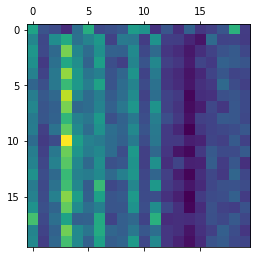

In [0]:
output_words, attentions = evaluate(
    encoder1, attn_decoder1, "so the sweet spot is between and .")
plt.matshow(attentions.numpy())

In [0]:
plt.show()

input = so the sweet spot is between and .
output = . . . . . . . . . . . . . . . . . . . .


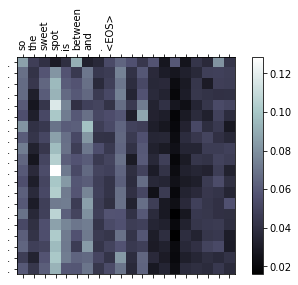

In [0]:
def showAttention(input_sentence, output_words, attentions):
    # Set up figure with colorbar
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(attentions.numpy(), cmap='bone')
    fig.colorbar(cax)

    # Set up axes
    ax.set_xticklabels([''] + input_sentence.split(' ') +
                       ['<EOS>'], rotation=90)
    ax.set_yticklabels([''] + output_words)

    # Show label at every tick
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

    plt.show()


def evaluateAndShowAttention(input_sentence):
    output_words, attentions = evaluate(
        encoder1, attn_decoder1, input_sentence)
    print('input =', input_sentence)
    print('output =', ' '.join(output_words))
    showAttention(input_sentence, output_words, attentions)


evaluateAndShowAttention( "so the sweet spot is between and .")


In [0]:
# plt.show()

In [0]:
print(attentions.size())

torch.Size([20, 20])


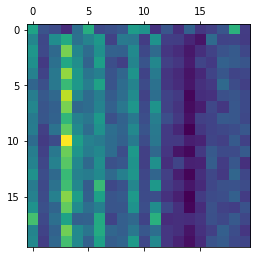

In [0]:
plt.matshow(attentions.numpy())

1. BiLSTM
2. GloVE embedding
3. presentation
4. BLUE Score and how error is calculated here
5. Figure out how attention figures are made.`


In [0]:

from nltk.translate.bleu_score import sentence_bleu
def calc_bleu(reference,nput,output):
 scores=[]
 score=0
 print(score)
 for sentence in range(len(reference)):
   score = sentence_bleu(reference[sentence],output[sentence])
   scores.append(score)
  
 
 for sentence in range(len(reference)):
   print("input sentence: ",nput[sentence])
   print("reference sentence:",reference[sentence])
   print("output sentence:",output[sentence])
   print("BLEU SCORE:",scores[sentence])

 return pd.DataFrame({"input sentence: ":nput,"reference sentence:":reference,"output sentence:":output,"BLEU SCORE:":scores})


In [0]:
calc_bleu(reference,nput,output)

0
input sentence:  even though they were caught they were eventually released after heavy international pressure .
reference sentence: vi mac du a bi bat nhung cuoi cung hoc cung uoc tha ra nho vao suc ep tu cong ong quoc te .
output sentence: va cac cac cac cac cac cac cac cac cac cac cac cac cac . <EOS>
BLEU SCORE: 0.5328985992883941
input sentence:  the chance for greatness for progress and for change dies the moment we try to be like someone else .
reference sentence: co hoi cho su vi ai tien bo va cho su thay oi bi dap tat khi ta co gang tro nen giong nhu mot nguoi khac .
output sentence: va cac cac cac cac cac cac cac cac cac cac cac cac cac cac cac cac cac cac cac . <EOS>
BLEU SCORE: 0.4910411500935599
input sentence:  back then we had no idea how much this trip would change our lives .
reference sentence: hoi o chung toi khong he biet chuyen i ay se thay oi cuoc song cua chung toi nhu the nao .
output sentence: cac cac toi toi toi toi toi toi toi toi toi toi toi cac cac . <EOS>

/usr/local/lib/python3.6/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


,input sentence:,reference sentence:,output sentence:,BLEU SCORE:
0,even though they were caught they were eventua...,vi mac du a bi bat nhung cuoi cung hoc cung uo...,va cac cac cac cac cac cac cac cac cac cac cac...,0.532899
1,the chance for greatness for progress and for ...,co hoi cho su vi ai tien bo va cho su thay oi ...,va cac cac cac cac cac cac cac cac cac cac cac...,0.491041
2,back then we had no idea how much this trip wo...,hoi o chung toi khong he biet chuyen i ay se t...,cac cac toi toi toi toi toi toi toi toi toi to...,0.568533
3,one day we wake up to the news of the desecrat...,mot ngay chung toi thuc giac voi tin tuc ve su...,va cac cac cac cac cac cac cac cac cac cac cac...,0.524634
4,you know it apos s remarkable how universal th...,ban biet ay ong tac trao may anh cua minh cho ...,cac . . . . . . . . . . . . . . . <EOS>,0.565912
